In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dữ liệu

In [2]:

try:
    df = pd.read_csv('../data/processed/superstore_final.csv')
    # Convert lại cột ngày tháng 
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['ship_date'] = pd.to_datetime(df['ship_date'])
    print(f" Loaded Data: {df.shape}")
except:
    print(" Không tìm thấy file processed. Vui lòng chạy lại file 02 trước.")

 Loaded Data: (51290, 33)


# TỔNG QUAN HIỆU SUẤT


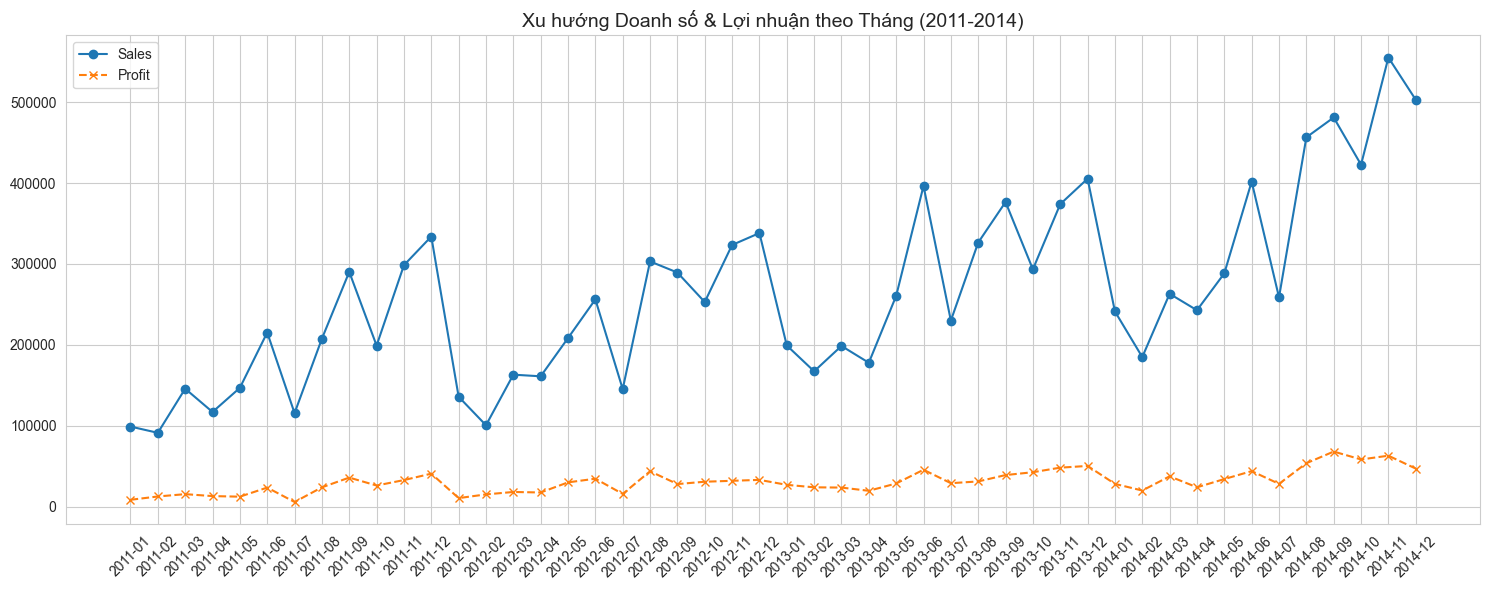

In [3]:
df['month_year'] = df['order_date'].dt.to_period('M').astype(str)
monthly_perf = df.groupby('month_year')[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(monthly_perf['month_year'], monthly_perf['sales'], label='Sales', marker='o', color='#1f77b4')
plt.plot(monthly_perf['month_year'], monthly_perf['profit'], label='Profit', marker='x', linestyle='--', color='#ff7f0e')
plt.title('Xu hướng Doanh số & Lợi nhuận theo Tháng (2011-2014)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# -> Insight: Cuối năm thường Sales cao, nhưng Profit có tăng tương ứng không?

# PHÂN TÍCH LỢI NHUẬN

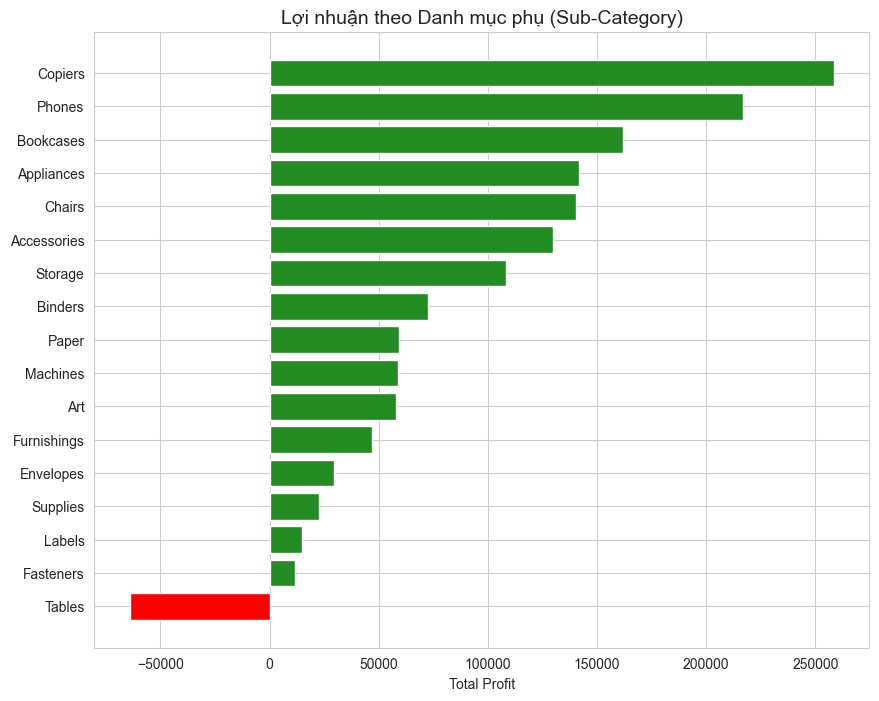

In [5]:
# 2.1. Danh mục nào đang "ăn mòn" lợi nhuận? (Profit by Sub-Category)
subcat_profit = df.groupby('sub_category')[['sales', 'profit']].sum().sort_values('profit')

# Tô màu: Đỏ nếu Lỗ, Xanh nếu Lãi
colors = ['red' if x < 0 else 'forestgreen' for x in subcat_profit['profit']]

plt.figure(figsize=(10, 8))
plt.barh(subcat_profit.index, subcat_profit['profit'], color=colors)
plt.title('Lợi nhuận theo Danh mục phụ (Sub-Category)', fontsize=14)
plt.xlabel('Total Profit')
plt.show()
# -> Insight: Chú ý nhóm 'Tables' (Bàn). Tại sao bán được hàng mà lại lỗ nặng